# Getting Started with pandas


Data structures: __Series__ and __DataFrame__.

#### Import pasdas module and additional modules

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Lab4/")

ModuleNotFoundError: No module named 'google'

### Drop specified labels from rows or columns.


___

## Pandas series

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of __data labels, called its index__. <br>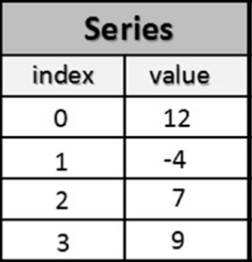



### - Declaring a Series

Simply call the __Series()__ constructor and pass as an argument an array containing the values to be included in it.

In [3]:
#Create a Series with tuple
s = pd.Series((1,2,3,4))
print(s)
#Create a Series with list
s = pd.Series([12, -4, 7, 9])
print(s)


0    1
1    2
2    3
3    4
dtype: int64
0    12
1    -4
2     7
3     9
dtype: int64


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1

In [4]:
# View index values
print(s.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# Creating Pandas series with index:
s = pd.Series([12, -4, 7, 9], index=['a', 'b', 'c', 'd'])
s

a    12
b    -4
c     7
d     9
dtype: int64

If you want to individually see the two arrays that make up this data structure,<br> you can call the two attributes of the series as follows: __index__ and __values__.

In [6]:
# View index values
print(s.index)
# View all values
print(s.values)

Index(['a', 'b', 'c', 'd'], dtype='object')
[12 -4  7  9]


In [7]:
# Create a Series from dictionary
# Keys of dictinary will be indexes of a Series
data = {'pi': 3.1415, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series ( data )
print(s3)

{'pi': 3.1415, 'e': 2.71828}
pi    3.14150
e     2.71828
dtype: float64


In [8]:
#Name a Series with name option
s4 = pd.Series(1, index=['a','b','c','d'], name="Ones")
print(s4)

a    1
b    1
c    1
d    1
Name: Ones, dtype: int64


In [9]:
#You can define a new series starting with NumPy arrays or with an existing series.
arr = np.array([1, 2, 3, 4])
s3 = pd.Series(arr)
s3

0    1
1    2
2    3
3    4
dtype: int64

---

### - Selecting the Internal Elements

In [10]:
s = pd.Series([12, -4, 7, 9], index=['a', 'b', 'c', 'd'])
print(s)

a    12
b    -4
c     7
d     9
dtype: int64


In [11]:
#You can select individual elements as ordinary numpy arrays, specifying the key.
s[2]

C:\Users\hoang\AppData\Local\Temp\ipykernel_15392\2612671394.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[2]


np.int64(7)

In [12]:
#You can specify the label corresponding to the position of the index
s['b']

np.int64(-4)

In [13]:
#You can use the corresponding labels, but specify the list of labels in an array
s[['b','c']]

b   -4
c    7
dtype: int64

In [14]:
#You can slice a Series with slicing notation [start:stop:step]
s[0:2]

a    12
b    -4
dtype: int64

### - Assigning Values to the Elements

In [15]:
s = pd.Series([12, -4, 7, 9], index=['a', 'b', 'c', 'd'])
print(s)

a    12
b    -4
c     7
d     9
dtype: int64


In [16]:
#You can select the value by index or by label, then assign a new value
s[2] = 0
s['b'] = 1
print(s)

a    12
b     1
c     0
d     9
dtype: int64


C:\Users\hoang\AppData\Local\Temp\ipykernel_15392\4205036593.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  s[2] = 0


### - Filtering Values

The NumPy library is the base of the pandas library.
Many operations that are applicable to NumPy arrays are extended to the series. <br>
One of these is __filtering values__ contained in the data structure through conditions.

In [17]:
s = pd.Series([12, -4, 7, 9], index=['a', 'b', 'c', 'd'])
print(s)

a    12
b    -4
c     7
d     9
dtype: int64


In [18]:
#You can filter with condition
s1= s[s > 7]
print(s1)
print("\ns > 7")
print(s>7)

a    12
d     9
dtype: int64

s > 7
a     True
b    False
c    False
d     True
dtype: bool


In [19]:
print(s[['a','c']])
print("*"*30)
s1 = s[s.index.isin( ['a','c'])]
print(s1)
print(s.index.isin( ['a','c']))

a    12
c     7
dtype: int64
******************************
a    12
c     7
dtype: int64
[ True False  True False]


In [20]:
nseries = pd.Series(range(20))
#print(nseries)
ns = nseries[nseries % 2 == 0]
ns

0      0
2      2
4      4
6      6
8      8
10    10
12    12
14    14
16    16
18    18
dtype: int64

### - Operations and Mathematical Functions

operators (+, -, *, and /) and mathematical functions that are applicable to NumPy array can be extended to series

In [21]:
s = pd.Series([12, -4, 7, 9], index=['a', 'b', 'c', 'd'])

In [22]:
s / 2

a    6.0
b   -2.0
c    3.5
d    4.5
dtype: float64

In [23]:
np.log(s)

c:\Users\hoang\.virtualenvs\myjupytervenvx64\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


a    2.484907
b         NaN
c    1.945910
d    2.197225
dtype: float64

### - Evaluating Duplicate Values

There are often duplicate values in a series. <br>
Then you may need to have more information about the samples, including __existence of any duplicates__ and whether a certain value is present in the series.

In [24]:
# There are duplicated values in the Series
serd = pd.Series([1,0,2,1,2,3], index=['white', 'white', 'blue', 'green', 'green', 'yellow'])
serd

white     1
white     0
blue      2
green     1
green     2
yellow    3
dtype: int64

To know all the values contained in the series, excluding duplicates, you can use the __unique()__ function. <br>
The return value is an array containing the unique values in the series, although not necessarily in order.

In [25]:
#Find an array containing the unique values in the series
serd.unique()

array([1, 0, 2, 3])

In [26]:
# value_count() is similar to unique() but also calculates the occurrences within a series
serd.value_counts()

1    2
2    2
0    1
3    1
Name: count, dtype: int64

In [27]:
#How to create Series with only unique index?
serd_value = serd.unique()
uniq_index = serd.index.unique()
print(uniq_index)
unique_serd = pd.Series(serd_value, index = uniq_index)
print(unique_serd)

Index(['white', 'blue', 'green', 'yellow'], dtype='object')
white     1
blue      0
green     2
yellow    3
dtype: int64


You can evaluate the membership of a Series data against the list you define with the __isin()__ function.
This function tells you if the values are contained in the data structure. Boolean values that are
returned can be very useful when filtering data in a series or in a column of a dataframe.

In [28]:
print(serd)
serd.isin([0,3])

white     1
white     0
blue      2
green     1
green     2
yellow    3
dtype: int64


white     False
white      True
blue      False
green     False
green     False
yellow     True
dtype: bool

In [29]:
serd[serd.isin([0,3])]

white     0
yellow    3
dtype: int64

### - NaN Values

This specific value __NaN (Not a Number)__ is used in pandas data structures to indicate the presence of __an empty field__ or something that’s __not definable numerically__. These data are often generated when extracting data from a questionable source or when the source is missing data. The NaN values can also be generated in special cases, such as calculations of logarithms of negative values, or exceptions during execution of some calculation or function.<br>

These NaN values are a problem and __must be managed__ in some way,especially during data analysis.

In [31]:
import pandas as pd
import numpy as np
#You can enter np.NaN or None wherever you want to define a missing value.
s2 = pd.Series([5, -3, np.nan, 14])
s2

0     5.0
1    -3.0
2     NaN
3    14.0
dtype: float64

In [32]:
s2[0] = None
s2

0     NaN
1    -3.0
2     NaN
3    14.0
dtype: float64

In [33]:
#Boolean data type will be converted to object
pd.Series([True, False], dtype=np.bool_).reindex([0, 1, 2])

0     True
1    False
2      NaN
dtype: object

In [34]:
#NAT for NumPy np.datetime64, np.timedelta64
pd.Series([1, 2], dtype=np.dtype("timedelta64[ns]")).reindex([0, 1, 2])

0   0 days 00:00:00.000000001
1   0 days 00:00:00.000000002
2                         NaT
dtype: timedelta64[ns]

The __isnull()__ and __notnull()__ functions are very useful to identify the indexes without a value.

In [35]:
#The isnull() function returns True at NaN values in the series
s2.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [36]:
#notnull() function returns True if they are not NaN.
s2.notnull()

0    False
1     True
2    False
3     True
dtype: bool

In [37]:
#These functions are often placed inside filters to make a condition.
snn = s2[s2.notnull()]
print("filter notnull()")
print(snn)

print("-"*10)
print("filter isnull()")
sn = s2[s2.isnull()]
print(sn)

filter notnull()
1    -3.0
3    14.0
dtype: float64
----------
filter isnull()
0   NaN
2   NaN
dtype: float64


#### Filtering Out NaN Values

You eliminated all the NaN values by using __dropna() function__

In [38]:
s2.dropna()

1    -3.0
3    14.0
dtype: float64

You can also directly perform the filtering function by placing __notnull() in the selection condition__

In [39]:
s2[s2.notnull()]

1    -3.0
3    14.0
dtype: float64

If you use the dropna() function on DataFrame, __if there is only one NaN value on a column or row, it will eliminate it__.

In [62]:
df3 = pd.DataFrame([[6,np.nan,6],[np.nan,np.nan,np.nan],[2,np.nan,5]],
                     index=['blue','green','red'],
                     columns=['ball','mug','pen'])
df3

,ball,mug,pen
blue,6.0,NaN,6.0
green,NaN,NaN,NaN
red,2.0,NaN,5.0


In [63]:
#if there is only one NaN value on a column or row, it will be eliminated
df3.dropna(how='any')

,ball,mug,pen


You can tells the dropna() function to delete only the rows or columns in which all elements are NaN.

In [64]:
#specify the how option with all (any or all)
df3.dropna(how='all')

,ball,mug,pen
blue,6.0,NaN,6.0
red,2.0,NaN,5.0


#### Filling in NaN Occurrences

Rather than filter NaN values within data structures, <br>
with the risk of discarding them along with values that could be relevant <br>
in the context of data analysis, you can __replace them with other numbers__.

The __fillna() function__ takes one argument, the value with which to replace any NaN. <br>
It can be the same for all cases.

In [65]:
df3

,ball,mug,pen
blue,6.0,NaN,6.0
green,NaN,NaN,NaN
red,2.0,NaN,5.0


In [66]:
df3.fillna(0)

,ball,mug,pen
blue,6.0,0.0,6.0
green,0.0,0.0,0.0
red,2.0,0.0,5.0


You can replace NaN with different values __depending on the column__, specifying one by one the indexes and the associated values.

In [67]:
df3.fillna({'ball':1, 'mug':0, 'pen': 99})

,ball,mug,pen
blue,6.0,0.0,6.0
green,1.0,0.0,99.0
red,2.0,0.0,5.0


In [68]:
#How to fill 'mug' column with the average of 'ball' column?
df3.fillna({'mug':df3['ball'].mean()})

,ball,mug,pen
blue,6.0,4.0,6.0
green,NaN,4.0,NaN
red,2.0,4.0,5.0


In [69]:
print(df3)

       ball  mug  pen
blue    6.0  NaN  6.0
green   NaN  NaN  NaN
red     2.0  NaN  5.0


### - Operations between Series

We can perform arithmetic operations between series and scalar values.<br> The same thing is possible by performing operations between two series, but in this case even the labels come into play.<br>
Series can __align data addressed differently__ between them by identifying their corresponding labels.

In [48]:
mydict = {'red': 2000, 'blue': 1000, 'yellow': 500, 'orange': 1000}
myseries = pd.Series(mydict)
myseries

red       2000
blue      1000
yellow     500
orange    1000
dtype: int64

In [49]:
colors = ['red', 'yellow', 'orange', 'blue', 'green']
myseries = pd.Series(mydict, index=colors)
myseries.index

Index(['red', 'yellow', 'orange', 'blue', 'green'], dtype='object')

In [50]:
mydict2 = {'red': 400, 'yellow': 1000, 'black': 700}
myseries2 = pd.Series(mydict2)
myseries2

red        400
yellow    1000
black      700
dtype: int64

In [51]:
#you add two series having only some elements in common with the label.
#All other labels present in one of the two series are still added to the result but have a NaN value
myseries + myseries2

black        NaN
blue         NaN
green        NaN
orange       NaN
red       2400.0
yellow    1500.0
dtype: float64

In [52]:
s1 = pd.Series([1, 2 ], index = [0,1])
s2 = pd.Series([2, 3], index = [0,1])
print(s1+s2)

0    3
1    5
dtype: int64


***

## Pandas DataFrame


The dataframe is a tabular data structure very similar to a spreadsheet. This data structure is designed to __extend series to multiple dimensions__. In fact, the dataframe consists of an ordered collection of columns, each of which can contain a value of a different type (numeric, string, Boolean, etc.).<br>

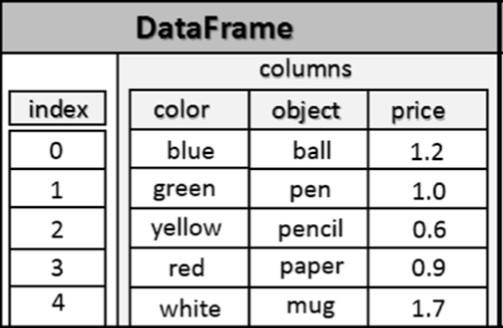

### - Defining a Dataframe

The most common way to create a new dataframe is precisely to pass a dict object to the __DataFrame() constructor__.

In [53]:
# A dataframe may also be understood as a dict of series, where the keys are thecolumn names
# and the values are the series that will form the columns of the dataframe.

data = {'color' : ['blue', 'green', 'yellow', 'red', 'white'],
        'object' : ['ball', 'pen', 'pencil', 'paper', 'mug'],
        'price' : [1.2, 1.0, 0.6, 0.9, 1.7]}
df = pd.DataFrame(data)
df

,color,object,price
0,blue,ball,1.2
1,green,pen,1.0
2,yellow,pencil,0.6
3,red,paper,0.9
4,white,mug,1.7


If the dict object from which you want to create a dataframe contains more data than you are interested in, you can make a selection

In [54]:
#you can specify a sequence of columns using the columns option.
df2 = pd.DataFrame(data, columns=['object', 'price'])
df2

,object,price
0,ball,1.2
1,pen,1.0
2,pencil,0.6
3,paper,0.9
4,mug,1.7


if you want to assign labels to the indexes of a dataframe, you have to use the __index option__ and assign it an array containing the labels.

In [55]:
df2 = pd.DataFrame(data, index=['one', 'two', 'three', 'four', 'five'])
df2

,color,object,price
one,blue,ball,1.2
two,green,pen,1.0
three,yellow,pencil,0.6
four,red,paper,0.9
five,white,mug,1.7


The index and columns are options that provide an alternative way to define a dataframe.<br>
Instead of using a dict object, you can define __three arguments in the constructor__, in the following order—a data matrix, an array containing the labels assigned to the index option, and an array containing the names of the columns assigned to the columns option.

In [56]:
# Create a matrix and assigned index and column name

df3 = pd.DataFrame(np.arange(16).reshape((4,4)),
                     index=['red', 'blue', 'yellow', 'white'],
                     columns=['ball', 'pen', 'pencil', 'paper'])
df3

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


If you pass a column that __<span style="color: red;">isn’t contained</span>__ in the dict, it will appear with __missing values__ in the result.

In [57]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

# Add column that does not exist in the data dictionary.
df2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
print(df2)
print("-"*10)
print(df2.columns)

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN
----------
Index(['year', 'state', 'pop', 'debt'], dtype='object')


<hr style="border:2px solid gray"> </hr>

### <span style='background:yellow'> _exercise_ </span>
Creating Pandas DataFrames<br>
<br>
The sample output is as follows: <br>

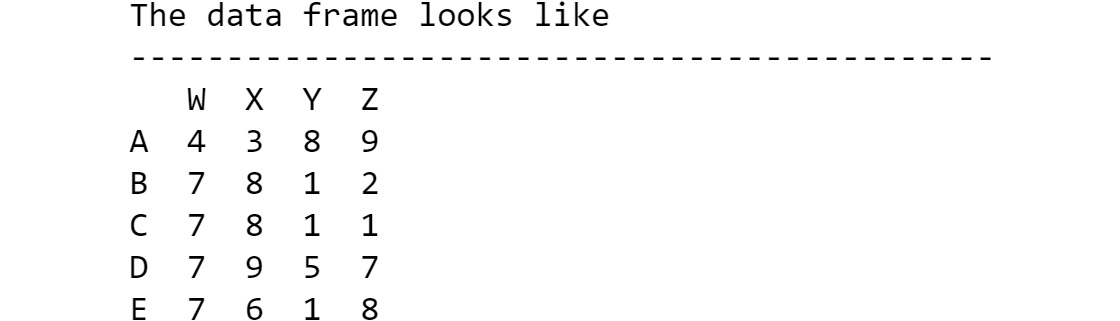


1. Create a simple DataFrame from a two-dimensional matrix of numbers. First, the code draws 20 random integers from the uniform distribution. Then, we need to reshape it into a (5,4) NumPy array – 5 rows and 4 columns:

In [58]:
#matrix_data


2. Define the rows labels as ('A','B','C','D','E') and column labels as ('W','X','Y','Z'):

In [59]:
row_labels =
column_headings =

SyntaxError: invalid syntax (2026680160.py, line 1)

3. Create a DataFrame using pd.DataFrame:

In [ ]:
df =

4. Print the DataFrame:

In [ ]:
print("\nThe data frame looks like\n",'-'*45, sep='')
print(df)

---

### - Reindexing

With DataFrame, we can use __reindex() function__ to alter either the (row) index, columns, or both.<br>
When passed only a sequence, it reindexes the rows in the result:

In [ ]:
df = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
df

In [ ]:
df2 = df.reindex(['a', 'b', 'c', 'd'])
df2

In [ ]:
states = ['Texas', 'Utah', 'California']
df.reindex(columns=states)

---

### - Selecting Elements

#### Indexing and Slicing Columns
There are two methods for indexing and slicing columns in a DataFrame. <br>
They are as follows:
- The __<span style="color: red;">DOT </span>__ method
- The __<span style="color: red;"> bracket</span>__ method



If you want to know the name of all the columns of a dataframe, you can is specify the __columns attribute__ on the instance of the dataframe object.

In [ ]:
data = {'color' : ['blue', 'green', 'yellow', 'red', 'white'],
        'object' : ['ball', 'pen', 'pencil', 'paper', 'mug'],
        'price' : [1.2, 1.0, 0.6, 0.9, 1.7]}
df = pd.DataFrame(data)
# use columns attribute to show the name of all columns
df

Similarly, to get the list of indexes, you should specify the __index attribute__.

In [ ]:
df.index

You can also get the entire set of data contained within the data structure using the __values attribute__.

In [ ]:
df.values

If you are interested in selecting only the contents of a column, you can write the name of the column.

In [ ]:
# specify desired columns inside a bracket
print(df['price'])
print("\nType of the column: ", type(df['price']), sep='')

In [ ]:
print(df[['color','price']])
print("\nType of the pair of columns: ", type(df[['color','price']]), sep='')

Another way to do this is to use the column name as an attribute of the instance of the dataframe.

In [ ]:
#The DOT method
df.price

#### Indexing and Slicing Rows
Indexing and slicing rows in a DataFrame can also be done using the following methods:
- The label-based __loc method__: you can access the data by the generic name of the row.
- The index-based __iloc method__: you to access the rows by their numerical index.

In [ ]:
df3 = pd.DataFrame(np.arange(16).reshape((4,4)),
                      index=['red','blue','yellow','white'],
                      columns=['ball','pen','pencil','paper'])
df3

In [ ]:
a = df3.loc['red']
print(a)
print("\nType of the row: ", type(a), sep='')

In [ ]:
b=df3.iloc[[0,3]]
#What's b?
#What's the type of b?
print(b)
print("\nType of the rows: ", type(b), sep='')

You can select rows using slicing operator

In [ ]:
#Using slicing operator to select desired rows
df3[0:3:2]
#What's the output?

if what you want to achieve is __a single value__ within a dataframe, you first use the name of the column and then the index or the label of the row.

In [ ]:
df3['pencil'][2]

### <span style='background:yellow'> _exercise_ </span>
select only value of paper column from blue and white rows

In [ ]:
#Your code?
df3


---

In [ ]:
df3['paper'].loc[['blue', 'white']]

### - Assigning Values

You follow the same logic of selecting value in DataFrame to add or change the values in it. <br>
<br>
Dataframe structure:
- an array of indexes is specified by the index attribute
- and the row containing the name of the columns is specified with the columns attribute.

You can also assign a label, using the __name attribute__, to these two substructures to identify them.

In [ ]:
data = {'color' : ['blue', 'green', 'yellow', 'red', 'white'],
        'object' : ['ball', 'pen', 'pencil', 'paper', 'mug'],
        'price' : [1.2, 1.0, 0.6, 0.9, 1.7]}
df3 = pd.DataFrame(data)
df3.index=['A','B','C','D','E']
print(df3)

In [ ]:
#assign a label to row and column attribute
df3.index.name = 'id';
df3.columns.name = 'item'
df3

You can add a new column by simply assigning a value to the instance of the dataframe and specifying a new column name.

In [ ]:
df3['new'] = 12
df3

You can update the contents of a column by using an array.

In [ ]:
df3['new'] = [3.0, 1.3, 2.2, 0.8, 1.1]
df3
#What will happen if df3['new'] = [3.0, 1.3, 2.2, 0.8]?

To change a single value, you simply select the item and give it the new value.

In [ ]:
df3.iloc[3,2] = 3.33
df3

In [ ]:
df3.loc['E','new']=2.5
#What will happen if df3.loc['new','E'] = 0.0
#How to drop the last row?
df3 = df3.drop('E')

In [ ]:
df3

### <span style='background:yellow'> _exercise_ </span>
set value of the new column in row A and B to 0.7

In [ ]:
#df3.iloc[]
df3.iloc[[0,1], [3]] = 0.7
df3
#Use .loc[]
#Use .loc

---

### - Membership of a Value

You have already seen the __isin() function__ applied to the series to determine the membership of a set of values. This is true for DataFrame.<br>

In [ ]:
df3.isin([1.0, 'pen'])

In [ ]:
# filtering
df3[df3.isin([1.0, 'pen'])]

---

### - Dropping Entries from an Axis

We can use __drop method__ to delete selected rows and columns.

In [ ]:
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
df

In [ ]:
#Calling drop with a sequence of labels will drop values from the row labels (axis 0):
df.drop(['Colorado', 'Ohio'])

In [ ]:
#drop values from the columns by passing axis=1 or axis='columns':
df.drop('two', axis = 1)

In [ ]:
df.drop(['two', 'four'], axis='columns')

In [ ]:
#What's the final value of df?
df = df.drop(['two', 'four'], axis='columns')
df

Many functions, like drop, which modify the size or shape of a Series or DataFrame, can manipulate an object __in-place__ without returning a new object:

In [ ]:
df

In [ ]:
df.drop('four', axis='columns', inplace = True)
df
#How to drop column 'four' from df?

You can also use the __del command__ to delete an entire column and all its contents

In [ ]:
del df['one']
df

---

### - Filtering
We can apply the filtering to a dataframe to get data that matched with a condition.

In [ ]:
dates=['April-10', 'April-11', 'April-12', 'April-13','April-14','April-16']
sales=[200,300,400,200,300,300]
prices=[3, 1, 2, 4,3,2]

df = pd.DataFrame({'Date':dates ,
                   'Sales':sales ,
                   'Price': prices})
df

In [ ]:
df_mask=df['Sales']==300
print(df_mask)
print("*"*30)
filtered_df = df[df_mask]
print(filtered_df)

In [ ]:
#How to write a shorter one?


 We can find positions (rows) at which boolean mask has True value using numpy __flatnonzero function__

In [ ]:
df_mask=df['Sales']==300
print(df_mask)
print('-'*10)

#find rows that contain True
positions = np.flatnonzero(df_mask)
print("Row number")
print(positions)
print('-'*10)

#select only rows that contain Ture
filtered_df=df.iloc[positions]
print(filtered_df)

In [ ]:
#To select Pandas rows that contain any one of multiple column values
# We can use isin() function
values=[200,400]
print(df.Sales.isin(values))
print('-'*10)

filtered_df = df[df.Sales.isin(values)]
print(filtered_df)

In [ ]:
#select only 200 or 2 from DataFrame
df[df.isin([200,2])]

In [ ]:
#select only rows that contain 200 or 2
print(df)
print('-'*10)
df_mask = df.isin([200,2])
print(df_mask)
print('-'*10)
print(df_mask.sum(axis=1))
print('-'*10)

# sum function return the sum of the values for the requested axis.
# axis{index (0), columns (1)}
positions = np.flatnonzero(df_mask.sum(axis=1))
print("Row number")
print(positions)
print('-'*10)

#select only rows that contain Ture
filtered_df=df.iloc[positions]
print(filtered_df)

---

### <span style='background:yellow'> _exercise_ </span>


In [ ]:
dates=['April-10', 'April-11', 'April-12', 'April-13','April-14','April-16']
sales=[200,300,400,200,300,300]
prices=[3, 1, 2, 4,3,2]
stock = [10,5,20,2,7,12]

df = pd.DataFrame({'Date':dates ,
                   'Sales':sales ,
                   'Price': prices,
                  'stock':stock})
df

Select only row that Sales > 200 and stock > 10

In [ ]:
a = df['Sales'] > 200
b = df['stock'] > 10
#print(pd.concat([a,b], axis=1))
df[a & b]


In [ ]:
#Show only rows that Sales > 200 or stock > 10
df[a | b]


---

### -Transposition of a Dataframe

In [ ]:
# Create a DataFrame with nested dicionary
nestdict = {'red': { 2012: 22, 2013: 33},
            'white': { 2011: 13, 2012: 22, 2013: 16},
            'blue': { 2011: 17, 2012: 27, 2013: 18}}
df = pd.DataFrame(nestdict)
df

You can get the transposition of the dataframe by adding the __T attribute__ to its application.

In [ ]:
df.T

---

### - Arithmetic and Data Alignment

Pandas can align indexes coming from two different data structures. <br>
This is especially true when you are performing an arithmetic operation on them. <br>
In fact, during these operations, not only can the indexes between the two structures __be in a different order__,<br>
but they also can be __present in only one of the two structures__.

In [ ]:
df1 = pd.DataFrame(np.arange(16).reshape((4,4)),
          index=['red', 'blue', 'yellow', 'white'],
          columns=['ball','pen','pencil','paper'])
print(df1)
print("-"*30)
df2= pd.DataFrame(np.arange(12).reshape((4,3)),
          index=['blue', 'green', 'white', 'yellow'],
          columns=['mug','pen','ball'])
print(df2)

In [ ]:
#Try to add as good as it can
df1 + df2

We also can call arithmetic methods from Dataframe.
- add()
- sub()
- div()
- mul()

In [ ]:
df1.add(df2)

In [ ]:
df1['eraser'] = ['a','b','d','e']
df2['eraser'] = ['1','2','3','4']
#print(df1)
#print(df2)
#What will happen?
#print(df1 + df2)

### - Operations Between DataFrame and Series

if the indexes of series __match the names of the columns__ of the dataframe, you can apply a direct operation.

In [ ]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),
          index=['red', 'blue', 'yellow', 'white'],
          columns=['ball','pen','pencil','paper'])
frame

In [ ]:
ser = pd.Series(np.arange(4), index=['ball','pen','pencil','paper'])
ser

In [ ]:
frame - ser

In [ ]:
ser['mug'] = 9
ser

In [ ]:
frame - ser

### - Function Application and Mapping

This section covers the pandas library functions.

#### Functions by Element

The pandas library is built on the foundations of NumPy and then extends many of its features by adapting them to new data structures as series and dataframe.<br>
Among these are __the universal functions__, called ufunc. This class of functions __operates by element__ in the data structure.

In [ ]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),
          index=['red', 'blue', 'yellow', 'white'],
          columns=['ball','pen','pencil','paper'])
frame

In [ ]:
np.sqrt(frame)

In [ ]:
frame + 2

In [ ]:
frame['eraser'] = ['1','2','3','4']
print(frame)
np.sqrt(frame)

#### Functions by Row or Column

We can define a lambda function that calculates the range covered by the elements in an array

In [ ]:
#Lambda function is a small anynomous function.
#A lambda function can take any number of arguments but can only return one expression.

f = lambda x: x.max() - x.min()

# It is possible to define the function this way as well:
def f(x):
    return x.max() - x.min()

In [ ]:
frame

In [ ]:
#Use the apply() function to apply the function on the dataframe.
#The result this time is one value for the column
frame.apply(f)

In [ ]:
# You have to set the axis option to 1 to apply the function by row instead of by column
frame.apply(f, axis=1)

In [ ]:
frame

The method apply() can also __return a series__. <br>
A useful case would be to extend the application to __many functions simultaneously__.

In [ ]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

ff = frame.apply(f)
print(ff)
print(ff.columns)
#Get 4 series

In [ ]:
print(ff.index)

In [ ]:
frame

In [ ]:
df = frame.apply(f, axis=1)
print(df)
print(df.columns)

__Element-wise Python functions__ <br>
Suppose you wanted to compute a formatted string from each floating-point value in frame. <br>
You can do this with __applymap__

In [ ]:
format = lambda x: '%.2f' % x

In [ ]:
frame.applymap(format)

The reason for the name applymap is that Series has a map method for applying an element-wise function:

In [ ]:
frame['paper'].map(format)

In [ ]:
#'DataFrame' object has no attribute 'map'
frame.map(format)

### - Sorting

Sorting the data is often a necessity and it is very important to be able to do it easily.<br>
pandas provides the __sort_index() function__, which returns a new object that’s identical to the start, but in which the elements are ordered.

In [ ]:
df = pd.DataFrame(np.random.randn(4, 4),
          index=['red', 'blue', 'yellow', 'white'],
          columns=['ball','pen','pencil','paper'])
df

In [ ]:
df.sort_index()

In [ ]:
#Sort columns
df.sort_index(axis=1)

In [ ]:
#Use sort_values() to  to sort the values contained in the data structure
df.sort_values(by='pen', ascending=False)

In [ ]:
#sorting based on two or more columns
df.sort_values(by=['pen','pencil'], ascending=False)

In [ ]:
df
#sort by value along 'red' index in ascending order?
df.sort_values(by = 'red', axis=1)


### - Summarizing and Computing Descriptive Statistics

Most of the statistical functions for arrays are still valid for dataframe, so using the __apply() function is no longer necessary__

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

In [ ]:
#DataFrame’s sum method returns a Series containing column sums:
df.sum()

In [ ]:
#Passing axis='columns' or axis=1 sums across the columns instead
df.sum(axis='columns')

In [ ]:
#DataFrame’s mean method returns a Series containing column mean:
df.mean(axis='columns')

In [ ]:
#NA values are excluded unless the entire slice (row or column in this case) is NA.
#This can be disabled with the skipna option:
df.mean(axis='columns', skipna=False)

In [ ]:
print(df)

In [ ]:
#idxmin and idxmax, return indirect statistics like the index value
df.idxmax()

In [ ]:
#find accumulations
df.cumsum()

In [ ]:
#Output basic statistics for the numeric columns
#describe() produce multiple summary statistics in one shot:
df.describe()

In [ ]:
df['fruit'] = ['apple','banana','apple','orange']
print(df)

In [ ]:
#Describe the shape of the object type
df.info()

In [ ]:
df.describe()

In [ ]:
df

In [ ]:
df.describe(include=[object])
#limit to the column with object type

In [ ]:
df.describe(include=[np.number])

In [ ]:
df.mean()

In [ ]:
#Calculate mean for all numeric columns
df.mean(numeric_only=True)

### - Correlation and Covariance
Two important statistical calculations are correlation and covariance, <br>
expressed in pandas by the __corr()__ and __cov()__ functions.

https://www.mygreatlearning.com/blog/covariance-vs-correlation/

In [ ]:
df = pd.DataFrame([[1,4,3,6],[4,5,6,1],[3,3,1,5],[4,1,6,4]],
          columns=['ball','pen','pencil','paper'])
df

In [ ]:
#“Correlation” measures both the strength and direction of the linear relationship between two variables.
#assume values from -1 to +1.
df.corr()

In [ ]:
#covariance
# “Covariance” indicates the direction of the linear relationship between variables.
df.cov()

---

### Interpolation
fills NA values using various interpolation methods.

In [ ]:
ser = pd.Series([1, np.nan, np.nan, 4, 12.2, 14.4])
ser

In [ ]:
methods = ["linear", "quadratic", "cubic"]
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

### Discretization and Binning

Continuous data is often discretized or otherwise separated into “bins” for analysis.

In [ ]:
#list of ages
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
# divide ages into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older
bins = [18, 25, 35, 60, 100]
#use cut to divide ages according to defined bins
cats = pd.cut(ages, bins)
print('-'*30)
#The object pandas returns is a special Categorical object
cats

In [ ]:
# the distinct category names for the ages data is in the categories attribute
# a parenthesis means that the side is open
# the square bracket means it is closed (inclusive).
cats.categories

In [ ]:
# a lable of the ages data is in the codes attribute
cats.codes

In [ ]:
#the bin counts for the result of pandas.cut
pd.value_counts(cats)

In [ ]:
#We can also pass our own bin names by passing a list or array to the labels option
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

In [ ]:
pd.value_counts(pd.cut(ages, bins, labels=group_names))

In [ ]:
data = np.random.rand(20)
# Defines the number of equal-width bins to 4 in the range of the data
#The precision=2 option limits the decimal precision to two digits.
#Pick the edges of bins based on the min and max of data
pd.cut(data, 4, precision=2)

In [ ]:
# create data frame
serprice = pd.Series(np.random.randint(5000, 350000,size=500))
serprice[0]=5000
serprice[1]=450000
df = pd.DataFrame(serprice, columns=['price'])
df.head(5)

In [ ]:
#define bins (3 bins)
bins = np.linspace(min(df['price']),max(df['price']),4)
#define group names
group_names=['Low','Medium','High']

In [ ]:
pd.cut(df['price'],bins,labels=group_names)
#What happen with df[0]?

In [ ]:
# create a Categorical object
# include_lowest specifies whether the first interval should be left-inclusive or not.
pd.cut(df['price'],bins,labels=group_names, include_lowest=True)

In [ ]:
# add a price_bins column
# include_lowest=True (include lowest (5000))
df['price_bins'] = pd.cut(df['price'],bins,labels=group_names, include_lowest=True)
df.head(5)

In [ ]:
df['price_bins'].value_counts()

In [ ]:
df['price_bins'].sort_values().hist()

In [ ]:
df['price_bins'].hist()

### Dummy variables in Pandas

In [ ]:
#Create a DataFrame with categorical variables
fuel_list = ['gas','diesel']
car_list = list('ABCDEFGHIJ')
random_fuel=np.random.choice(fuel_list, 10)
df =pd.DataFrame({'Car':car_list,'Fuel':random_fuel})
df

In [ ]:
#Convert categorical variable into dummy/indicator variables with get_dummies()
#Add dummy variables for each unique category
#Assign 0 or 1 in each category
df_dummy=pd.get_dummies(df['Fuel'], dtype='int')
df_dummy

In [ ]:
type(df_dummy)

In [ ]:
#merge dataframe with join(). Row index must be equal
df_with_dummy = df.join(df_dummy)
df_with_dummy

In [ ]:
#merge dataframe with concat()
df_with_dummy2 = pd.concat([df,pd.get_dummies(df['Fuel'], dtype='int')], axis=1)
df_with_dummy2

In [ ]:
#combine get_dummies with a discretization function like cut
np.random.seed(12345)
values = np.random.rand(10)
print(values)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins), dtype='int')

### Combining and Merging Datasets

#### Database-Style DataFrame Joins

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [ ]:
df1

In [ ]:
df2

In [ ]:
#merge uses the overlapping column names as the keys (inner)
pd.merge(df1, df2)

In [ ]:
#It’s a good practice to specify the key explicitly
pd.merge(df1, df2, on='key')

In [ ]:
pd.merge(df1, df2, on = 'key', how='outer')

In [ ]:
#If the column names are different in each object, you can specify them separately
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

In [ ]:
df3

In [ ]:
df4

#### Different join types with how argument
<br>

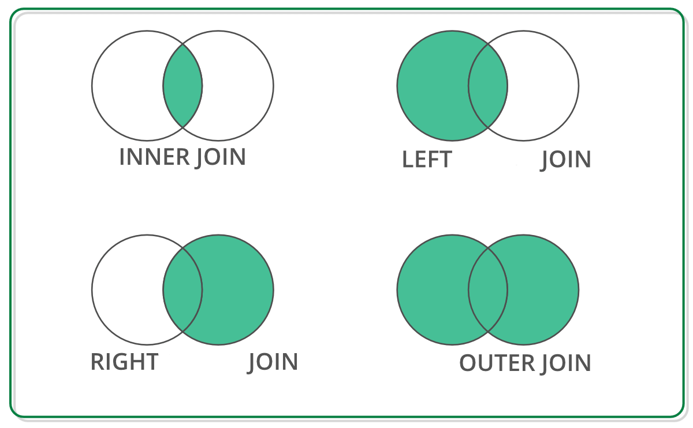

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [ ]:
print(df1)
print("---------")
print(df2)

In [ ]:
# inner
print(sorted(df1['key'].unique()))
print(sorted(df2['key'].unique()))
pd.merge(df1, df2, how='inner')

In [ ]:
# outer
print(sorted(df1['key'].unique()))
print(sorted(df2['key'].unique()))
pd.merge(df1, df2, how='outer')

In [ ]:
# left
print(sorted(df1['key'].unique()))
print(sorted(df2['key'].unique()))
pd.merge(df1, df2, on='key', how='left')

In [ ]:
# right
print(sorted(df1['key'].unique()))
print(sorted(df2['key'].unique()))
pd.merge(df1, df2, on='key', how='right')

In [ ]:
import pandas as pd
df1 = pd.DataFrame([['a', 1],['b', 2]], columns = ['letter','number'])
df3 = pd.DataFrame([['c', 3,'cat'],['d', 4, 'dog']], columns = ['letter','number', 'animal'])
df4 = pd.DataFrame([['c', 3,'cat'],['d', 4, 'dog'], ['e', 5, 'bird']], columns = ['letter','number', 'animal'])

In [ ]:
print(df1)
print(df3)
print(df4)

In [ ]:
pd.concat([df1, df4], axis = 1)

In [ ]:
df1 = pd.DataFrame({'lkey':['b','b','a','c','a','a','b'], 'data1':range(7)})
df2 = pd.DataFrame({'rkey':['a', 'b', 'd'], 'data2':range(3)})
pd.merge(df1, df2, left_on = 'lkey', right_on = 'rkey', how = 'outer')

In [ ]:
df1

In [ ]:
df2

#### Concatenating Along an Axis

The data structures like series and dataframe, having labeled axes allows us to do concatenation.

In [ ]:
ser1 = pd.Series(np.random.rand(4), index=[1,2,3,4])
ser2 = pd.Series(np.random.rand(4), index=[5,6,7,8])
print(ser1)
print(ser2)

In [ ]:
#By default, the concat() function works on axis = 0
pd.concat([ser1,ser2])

In [ ]:
#If you set the axis = 1, then the result will be a dataframe
pd.concat([ser1,ser2],axis=1)

In [ ]:
ser11 = pd.Series(np.random.rand(4), index=[1,2,3,4])
ser21 = pd.Series(np.random.rand(8), index=[1,2,3,4,5,6,7,8])
pd.concat([ser11, ser21], axis=1)
#What will happen?

In [ ]:
pd.concat([ser1,ser2], keys=[1,2])

In [ ]:
#Apply concat() to the dataframe
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
print(df1)
print(df3)

In [ ]:
#work on axis=0
pd.concat([df1, df3])

In [ ]:
#work on axis = 1 (match rows with same index)
pd.concat([df1,df3],axis=1)

In [ ]:
#Apply concat() to the dataframe
df11 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df31 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog'], ['e', 5, 'bird']],
                   columns=['letter', 'number', 'animal'])
pd.concat([df11, df31],axis=1)

In [ ]:
df11

In [ ]:
df31

In [ ]:
#Use the keys option to create a hierarchical index
#work on axis =0
pd.concat([df1, df3], keys=['df1','df3'])

In [ ]:
pd.concat([df1, df3], keys=['df1','df3']).index

In [ ]:
#Use the keys option to create a hierarchical index
#work on axis =1
pd.concat([df1, df3], keys=['df1','df3'], axis=1)

### GroupBy and Aggregate (Split-Apply-Combine)
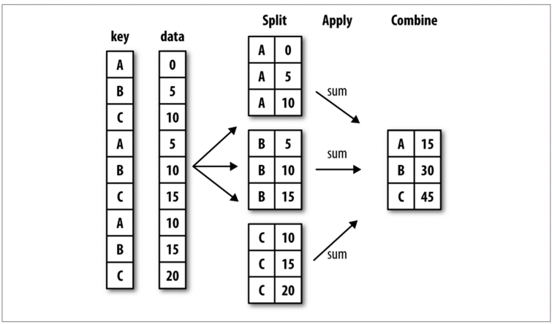


In [ ]:
np.random.seed(12345)
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randint(0,10,5),
                   'data2' : np.random.randint(0,10,5)})
df

In [ ]:
group1 = df.groupby('key1')
group2 = df.groupby(['key1','key2'])
group2.sum()


In [ ]:
group1 = df.groupby('key1')[['data1','data2']]
group1.cumsum()

In [ ]:
#split data1 into group by key1
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
grouped.groups

In [ ]:
# apply aggreation function on each group and combine to a single series
grouped.mean()

In [ ]:
df.groupby('key1').mean()

In [ ]:
# Grouping the data using two keys, and the resulting Series now has
# a hierarchical index consisting of the unique pairs of keys observed
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby(['key1', 'key2']).size()

### String

In [ ]:
#Use object as a default type of string
pd.Series(["a", "b", "c"])

In [ ]:
#To explicitly request string dtype, specify the dtype
pd.Series(["a", "b", "c"], dtype="string")

In [ ]:
x = pd.Series(["a1", "b2", "c3"], dtype="string")
x

In [ ]:
x.str.extract("([ab])")

In [ ]:
x.str.extract("(\d)")

### Timestamps vs. time spans

In [ ]:
#Series and DataFrame can directly also support the time component as data itself.
pd.Series(pd.date_range("2024", freq="D", periods=3))

In [ ]:
import datetime
t_instant = pd.Timestamp(datetime.datetime(2024, 5, 1,13,10))
t_instant

In [ ]:
t_period = pd.Period("2024-05", freq="D")
t_period

In [ ]:
print(t_period.start_time, t_period.end_time)

In [ ]:
#check that the instant time is within the time period
(t_period.start_time
